In [1]:
import matplotlib.pyplot as plt
from skest import *
import scipy
import time
from signals import *
import numpy as np

### different noise level

In [2]:
n = 70
p = 110
Psi = toeplitz(0.5, p)

In [3]:
beta_star = smooth_stair(10, 5, 20, 0, 4)

### sigma = 1

In [4]:
sigma = 1

In [5]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [6]:
naive_cv_cov(X)

({'t': 0.4}, 2.486032485961914)

In [7]:
D_w = weighted_incidence(cov_est(0.4).fit(X).S)

In [8]:
D_w.shape

(82, 110)

In [15]:
def M_thresh(Psi, t):
    M = np.copy(Psi)
    M[np.abs(Psi) < t] = 0
    return M

In [10]:
D_oracle = weighted_incidence(Psi)

In [11]:
D = chain_incidence(p)

In [11]:
D_oracle.shape

(5995, 110)

In [19]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 0.49955153465270996)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -8265.80026168  -8264.14715471  -8266.20208939  -8286.92919554
  -8322.39519808  -8383.48644442  -8510.015193    -8769.28051315
  -9026.04380088  -9514.2666944  -10073.28424708 -10584.22038753
 -11052.99737646 -11492.95874042 -12291.1474382  -13016.45771499
 -13677.8118305  -14856.82574024 -15896.96527186             nan
             nan -21074.96404781  -8489.1126924   -8288.74118008
  -8289.167598    -8323.26724034  -8383.83767558  -8510.26374813
  -8769.47234882  -9025.90340075  -9514.22945558 -10073.30191206
 -10583.22996044 -11053.38690394 -11491.13948156 -12290.66828627
 -13006.9320376  -13662.49103476 -14829.42670146             nan
 -18013.83614793 -19746.11994665 -21074.55339171 -10553.30904253
  -8492.17266084  -8308.96881153  -8331.20974796  -8387.91180889
  -8512.39658565  -8770.61271744  -9026.73980203  -9514.64600882
 -10073.6169

({'l1': 0, 'l2': 0.001}, 15.221730709075928)
({'l1': 0, 'l2': 10}, 12.175011396408081)
({'l1': 0, 'l2': 5}, 15.730562686920166)


In [20]:
print(naive_cv_gtv_small(X, y, D_oracle))

({'l1': 1, 'l2': 1, 'l3': 0}, 72.2368996143341)


In [21]:
print(naive_cv_gtv(X, y, D_w))

({'l1': 7.5, 'l2': 0, 'l3': 0}, 15.39406943321228)


In [22]:
naive_cv(OUR, X, y, D)

({'l1': 15, 'l2': 7.5}, 13.541502475738525)

In [12]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 10, D).fit(X,y)
    clf5 = SL(0, 5, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(1, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(15, 7.5, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [13]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 10, D).fit(X,y)
    clf5 = SL(0, 5, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(1, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(15, 7.5, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [14]:
from joblib import Parallel, delayed
import multiprocessing

In [15]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [16]:
ar1 = [l[0] for l in l2s]
ar2 = [l[1] for l in l2s]
ar3 = [l[2] for l in l2s]
ar4 = [l[3] for l in l2s]
ar5 = [l[4] for l in l2s]
ar6 = [l[5] for l in l2s]
ar7 = [l[6] for l in l2s]
ar8 = [l[7] for l in l2s]

In [17]:
ap1 = [l[0] for l in preds]
ap2 = [l[1] for l in preds]
ap3 = [l[2] for l in preds]
ap4 = [l[3] for l in preds]
ap5 = [l[4] for l in preds]
ap6 = [l[5] for l in preds]
ap7 = [l[6] for l in preds]
ap8 = [l[7] for l in preds]


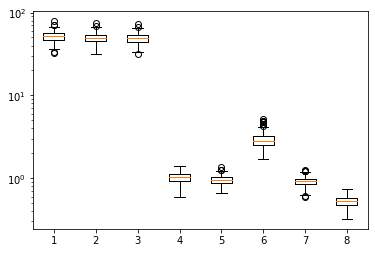

In [18]:
plt.boxplot([ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8])
plt.yscale("log")

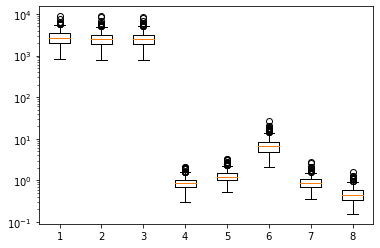

In [19]:
plt.boxplot([ap1, ap2, ap3, ap4, ap5, ap6, ap7, ap8])
plt.yscale("log")

### sigma = 2

In [20]:
sigma = 2

In [32]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [22]:
naive_cv_cov(X)

({'t': 0.4}, 0.047501325607299805)

In [23]:
D_w = weighted_incidence(cov_est(0.4).fit(X).S)

In [24]:
D_w.shape

(90, 110)

In [47]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 0.5012919902801514)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -4845.05318666  -4844.26701279  -4845.84204419  -4861.86503311
  -4889.9787015   -4940.23492651  -5051.43930572  -5303.31789576
  -5579.55734866  -6166.2678802   -6921.3949232   -7670.84881007
  -8408.23854462  -9128.17718572 -10500.29637381 -11793.86559851
 -13014.99527413 -15321.79735322 -17229.9140812  -21391.24748112
 -24661.16626513 -16353.73308797  -5000.64692145  -4861.09336076
  -4863.39794191  -4890.62079996  -4940.64945214  -5051.66426259
  -5303.446234    -5579.56581668  -6166.7047876   -6921.12009494
  -7672.28821801  -8408.90484914  -9126.00234433 -10494.55915241
 -11782.68048197 -13004.22411801 -15178.14947646 -17144.05262392
 -21465.39425202 -24588.69724497 -16353.58487927  -6464.5544713
  -5003.19740513  -4877.24579523  -4896.29758841  -4943.62549959
  -5053.25896739  -5304.34214924  -5580.19903063  -6167.13504827
  -6921.68636

({'l1': 0, 'l2': 0.001}, 15.062280893325806)
({'l1': 0, 'l2': 50}, 11.928704738616943)
({'l1': 0.5, 'l2': 25}, 14.720515251159668)


In [48]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 10, 'l2': 1, 'l3': 0}, 72.59264302253723)
({'l1': 12.5, 'l2': 0, 'l3': 0}, 16.97055745124817)


In [33]:
naive_cv(OUR, X, y, D)

({'l1': 20, 'l2': 10}, 6.986928462982178)

In [34]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 50, D).fit(X,y)
    clf5 = SL(0.5, 25, D).fit(X,y)
    clf6 = GTV(12.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(10, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(20, 10, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [35]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 50, D).fit(X,y)
    clf5 = SL(0.5, 25, D).fit(X,y)
    clf6 = GTV(12.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(10, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(20, 10, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [36]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [37]:
br1 = [l[0] for l in l2s]
br2 = [l[1] for l in l2s]
br3 = [l[2] for l in l2s]
br4 = [l[3] for l in l2s]
br5 = [l[4] for l in l2s]
br6 = [l[5] for l in l2s]
br7 = [l[6] for l in l2s]
br8 = [l[7] for l in l2s]

In [38]:
bp1 = [l[0] for l in preds]
bp2 = [l[1] for l in preds]
bp3 = [l[2] for l in preds]
bp4 = [l[3] for l in preds]
bp5 = [l[4] for l in preds]
bp6 = [l[5] for l in preds]
bp7 = [l[6] for l in preds]
bp8 = [l[7] for l in preds]


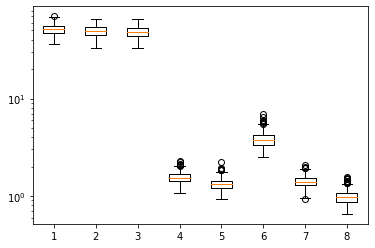

In [39]:
plt.boxplot([br1, br2, br3, br4, br5, br6, br7, br8])
plt.yscale("log")

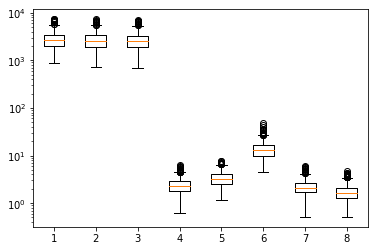

In [40]:
plt.boxplot([bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8])
plt.yscale("log")

### sigma = 3

In [45]:
sigma = 3

In [46]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.4}, 0.04521036148071289)

In [47]:
D_w = weighted_incidence(cov_est(0.4).fit(X).S)

In [48]:
D_w.shape

(90, 110)

In [60]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 0.5411210060119629)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -7448.44207318  -7447.90580188  -7450.79532829  -7479.71204674
  -7528.14149333  -7609.21175442  -7771.69742021  -8093.03250976
  -8405.31664384  -9000.81731348  -9700.60763564 -10360.09283869
 -10989.99352329 -11593.03227284 -12747.5027735  -13864.88703547
 -14864.62895346 -16806.9905952  -18613.19812184 -22856.42609121
 -26092.66551864 -20609.09530972  -7702.41514581  -7477.29605327
  -7482.43252761  -7529.30831901  -7609.90434507  -7772.23726773
  -8093.38304678  -8405.71354211  -9001.57750116  -9700.45962984
 -10359.84043191 -10988.74468574 -11592.90750975 -12736.10825185
 -13815.34862574 -14849.78792322 -16692.76542438 -18535.70095732
 -22446.21534237 -25862.33879976 -20608.06633831  -9830.98702888
  -7704.06734233  -7506.91399472  -7539.34184505  -7615.14967115
  -7774.807324    -8094.72186627  -8406.71611973  -9002.31062923
  -9701.1794

({'l1': 0, 'l2': 0.001}, 15.844774007797241)
({'l1': 0.01, 'l2': 40}, 11.94263243675232)
({'l1': 0.001, 'l2': 30}, 15.296736240386963)


In [63]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 5, 'l2': 5, 'l3': 0}, 73.66869497299194)
({'l1': 15, 'l2': 0, 'l3': 0}, 18.212224006652832)


In [64]:
naive_cv(OUR, X, y, D)

({'l1': 30, 'l2': 15}, 13.963613510131836)

In [49]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0.01, 40, D).fit(X,y)
    clf5 = SL(0.001, 30, D).fit(X,y)
    clf6 = GTV(15, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(30, 15, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0.01, 40, D).fit(X,y)
    clf5 = SL(0.001, 30, D).fit(X,y)
    clf6 = GTV(15, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(30, 15, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [50]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [51]:
cr1 = [l[0] for l in l2s]
cr2 = [l[1] for l in l2s]
cr3 = [l[2] for l in l2s]
cr4 = [l[3] for l in l2s]
cr5 = [l[4] for l in l2s]
cr6 = [l[5] for l in l2s]
cr7 = [l[6] for l in l2s]
cr8 = [l[7] for l in l2s]

In [52]:
cp1 = [l[0] for l in preds]
cp2 = [l[1] for l in preds]
cp3 = [l[2] for l in preds]
cp4 = [l[3] for l in preds]
cp5 = [l[4] for l in preds]
cp6 = [l[5] for l in preds]
cp7 = [l[6] for l in preds]
cp8 = [l[7] for l in preds]

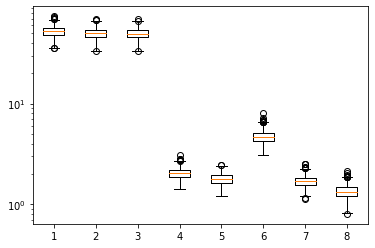

In [53]:
plt.boxplot([cr1, cr2, cr3, cr4, cr5, cr6, cr7, cr8])
plt.yscale("log")

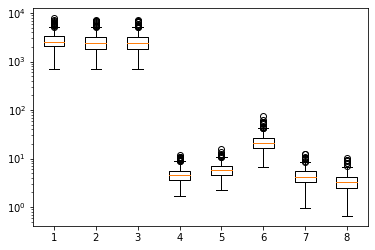

In [54]:
plt.boxplot([cp1, cp2, cp3, cp4, cp5, cp6, cp7, cp8])
plt.yscale("log")

### sigma = 4

In [55]:
sigma = 4

In [56]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.4}, 0.05182671546936035)

In [57]:
D_w = weighted_incidence(cov_est(0.4).fit(X).S)

In [58]:
D_w.shape

(90, 110)

In [96]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 0.4985826015472412)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -6584.49917259  -6584.54269421  -6590.91694417  -6653.52939037
  -6756.24773271  -6923.23704822  -7242.69408935  -7834.33842465
  -8373.93442767  -9341.67666698 -10398.12369134 -11334.91831182
 -12184.72315647 -12967.6424763  -14360.96740783 -15601.68436888
 -16713.51542856 -18687.9001287  -20337.29383982 -23780.75844825
 -26454.85763438 -19482.77484957  -6757.88016736  -6608.90316535
  -6655.33808044  -6756.99828798  -6923.72684026  -7243.43053815
  -7834.7494949   -8374.9016924   -9341.77608347 -10398.59420901
 -11335.76697635 -12184.66375281 -12964.2068588  -14353.82560176
 -15590.9154097  -16658.22992937 -18585.4703913  -20252.66749416
 -23696.57982423 -26208.06028753 -19367.90672912  -8190.7517903
  -6765.16119722  -6671.87414874  -6763.81815974  -6927.38927971
  -7245.32465553  -7835.85303936  -8375.71062753  -9342.31283184
 -10399.00948

({'l1': 0, 'l2': 0}, 14.857770442962646)
({'l1': 0, 'l2': 75}, 11.983863353729248)
({'l1': 0, 'l2': 75}, 15.861830472946167)


In [97]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 5, 'l2': 5, 'l3': 0}, 69.70415616035461)
({'l1': 40, 'l2': 0, 'l3': 0}, 16.273940801620483)


In [98]:
naive_cv(OUR, X, y, D)

({'l1': 50, 'l2': 25}, 13.899887084960938)

In [59]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0).fit(X,y)
    clf4 = FL(0, 75, D).fit(X,y)
    clf5 = SL(0, 75, D).fit(X,y)
    clf6 = GTV(40, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(50, 25, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0).fit(X,y)
    clf4 = FL(0, 75, D).fit(X,y)
    clf5 = SL(0, 75, D).fit(X,y)
    clf6 = GTV(40, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(50, 25, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [60]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [61]:
dr1 = [l[0] for l in l2s]
dr2 = [l[1] for l in l2s]
dr3 = [l[2] for l in l2s]
dr4 = [l[3] for l in l2s]
dr5 = [l[4] for l in l2s]
dr6 = [l[5] for l in l2s]
dr7 = [l[6] for l in l2s]
dr8 = [l[7] for l in l2s]

In [62]:
dp1 = [l[0] for l in preds]
dp2 = [l[1] for l in preds]
dp3 = [l[2] for l in preds]
dp4 = [l[3] for l in preds]
dp5 = [l[4] for l in preds]
dp6 = [l[5] for l in preds]
dp7 = [l[6] for l in preds]
dp8 = [l[7] for l in preds]

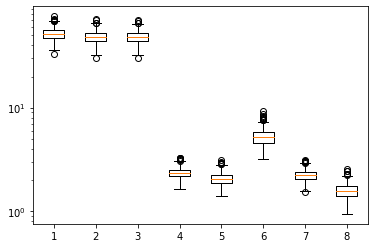

In [63]:
plt.boxplot([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8])
plt.yscale("log")

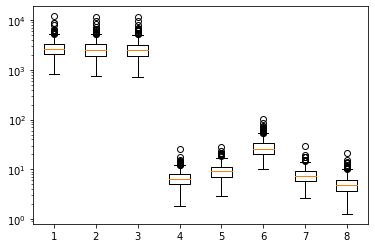

In [64]:
plt.boxplot([dp1, dp2, dp3, dp4, dp5, dp6, dp7, dp8])
plt.yscale("log")

### sigma = 5

In [73]:
sigma = 5

In [74]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.4}, 0.04181075096130371)

In [67]:
D_w = weighted_incidence(cov_est(0.4).fit(X).S)

In [68]:
D_w.shape

(90, 110)

In [150]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv_large(FL, X, y, D))
print(naive_cv_large(SL, X, y, D))

({'l1': 0}, 0.42821455001831055)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -4775.36555896  -4775.34986085  -4777.84539719  -4802.87412715
  -4844.94607193  -4915.8184892   -5059.86516618  -5352.57682182
  -5647.82284637  -6239.25137779  -6970.39289066  -7691.20746234
  -8403.08809666  -9101.10414071 -10460.59268211 -11772.3792374
 -13057.55508747 -15420.07059615 -17636.5328429  -22523.80847739
 -26657.29896644 -16298.82200275  -4937.67063034  -4793.8522241
  -4804.57289677  -4845.67240101  -4916.25686673  -5060.03656262
  -5352.77464848  -5648.25816413  -6239.20068094  -6971.32480402
  -7692.72382029  -8402.56499446  -9100.42903417 -10453.37312943
 -11752.98930836 -12988.67180868 -15347.19646915 -17455.57647093
 -22408.30562673 -26240.40950966 -16292.75018268  -6311.7218303
  -4940.39101698  -4819.3670953   -4851.76307374  -4919.3552281
  -5061.64684105  -5353.70054478  -5648.89774081  -6239.77859454
  -6971.81949389

({'l1': 0, 'l2': 0.001}, 14.37370753288269)
({'l1': 1, 'l2': 50}, 13.198934078216553)
({'l1': 5, 'l2': 50}, 15.463436365127563)


In [76]:
print(naive_cv_large(FL, X, y, D))
print(naive_cv_large(SL, X, y, D))

({'l1': 0, 'l2': 70}, 9.902438402175903)
({'l1': 0, 'l2': 30}, 15.615888118743896)


In [121]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 5, 'l2': 10, 'l3': 0}, 70.84979224205017)
({'l1': 30, 'l2': 0, 'l3': 0}, 17.221370458602905)


In [75]:
naive_cv_large(OUR, X, y, D)

({'l1': 70, 'l2': 20}, 13.05536150932312)

In [78]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 70, D).fit(X,y)
    clf5 = SL(0, 30, D).fit(X,y)
    clf6 = GTV(25, 0.01, 0, D_w).fit(X,y)
    clf7 = GTV(5, 10, 0, D_oracle).fit(X,y)
    clf8 = OUR(70, 20, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 70, D).fit(X,y)
    clf5 = SL(0, 30, D).fit(X,y)
    clf6 = GTV(25, 0.01, 0, D_w).fit(X,y)
    clf7 = GTV(5, 10, 0, D_oracle).fit(X,y)
    clf8 = OUR(70, 20, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [79]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [80]:
er1 = [l[0] for l in l2s]
er2 = [l[1] for l in l2s]
er3 = [l[2] for l in l2s]
er4 = [l[3] for l in l2s]
er5 = [l[4] for l in l2s]
er6 = [l[5] for l in l2s]
er7 = [l[6] for l in l2s]
er8 = [l[7] for l in l2s]

In [81]:
ep1 = [l[0] for l in preds]
ep2 = [l[1] for l in preds]
ep3 = [l[2] for l in preds]
ep4 = [l[3] for l in preds]
ep5 = [l[4] for l in preds]
ep6 = [l[5] for l in preds]
ep7 = [l[6] for l in preds]
ep8 = [l[7] for l in preds]

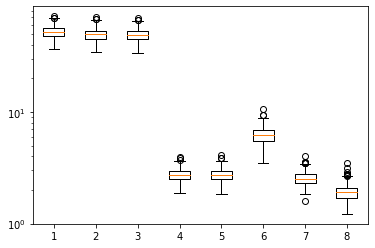

In [82]:
plt.boxplot([er1, er2, er3, er4, er5, er6, er7, er8])
plt.yscale("log")

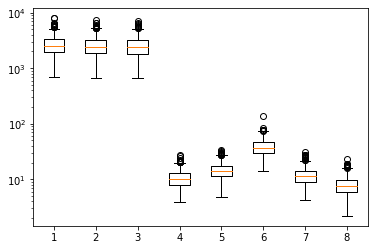

In [83]:
plt.boxplot([ep1, ep2, ep3, ep4, ep5, ep6, ep7, ep8])
plt.yscale("log")

### plots

In [84]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'

In [85]:
LA_risk_med = [np.median(r) for r in [ar1, br1, cr1, dr1, er1]]
LA_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar1, br1, cr1, dr1, er1]], [np.quantile(r, 0.75) - np.median(r) for r in [ar1, br1, cr1, dr1, er1]]]

In [86]:
EN_risk_med = [np.median(r) for r in [ar3, br3, cr3, dr3, er3]]
EN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar3, br3, cr3, dr3, er3]], [np.quantile(r, 0.75) - np.median(r) for r in [ar3, br3, cr3, dr3, er3]]]

In [87]:
FL_risk_med = [np.median(r) for r in [ar4, br4, cr4, dr4, er4]]
FL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar4, br4, cr4, dr4, er4]], [np.quantile(r, 0.75) - np.median(r) for r in [ar4, br4, cr4, dr4, er4]]]

In [88]:
SL_risk_med = [np.median(r) for r in [ar5, br5, cr5, dr5, er5]]
SL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar5, br5, cr5, dr5, er5]], [np.quantile(r, 0.75) - np.median(r) for r in [ar5, br5, cr5, dr5, er5]]]

In [89]:
GTVEST_risk_med = [np.median(r) for r in [ar6, br6, cr6, dr6, er6]]
GTVEST_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar6, br6, cr6, dr6, er6]], [np.quantile(r, 0.75) - np.median(r) for r in [ar6, br6, cr6, dr6, er6]]]

In [90]:
GTVORC_risk_med = [np.median(r) for r in [ar7, br7, cr7, dr7, er7]]
GTVORC_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar7, br7, cr7, dr7, er7]], [np.quantile(r, 0.75) - np.median(r) for r in [ar7, br7, cr7, dr7, er7]]]

In [91]:
GEN_risk_med = [np.median(r) for r in [ar8, br8, cr8, dr8, er8]]
GEN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar8, br8, cr8, dr8, er8]], [np.quantile(r, 0.75) - np.median(r) for r in [ar8, br8, cr8, dr8, er8]]]

In [92]:
xs = ["1","2" ,"3" ,"4" ,"5"]

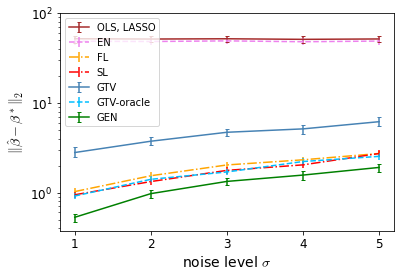

In [98]:
plt.errorbar(xs, LA_risk_med, yerr = LA_risk_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_risk_med, yerr = EN_risk_err, fmt = '--',color = 'violet', label = "EN")
plt.errorbar(xs, FL_risk_med, yerr = FL_risk_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_risk_med, yerr = SL_risk_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_risk_med, yerr = GTVEST_risk_err, capsize = 2, color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_risk_med, yerr = GTVORC_risk_err, fmt = '--', color = 'deepskyblue', label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_risk_med, yerr = GEN_risk_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.legend(loc = 'upper left')
plt.yticks([1, 10, 100], size = 12)
plt.xticks(["1",'2','3','4', '5'], size = 12)
plt.xlabel(r"noise level $\sigma$", size = 14)
plt.ylabel(r'$\| \hat{\beta} - \beta^*\|_2$', size = 14)
plt.savefig('134a_v2.jpg', bbox_inches='tight', dpi = 600)

In [99]:
LA_pred_med = [np.median(r) for r in [ap1, bp1, cp1, dp1, ep1]]
LA_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap1, bp1, cp1, dp1, ep1]], [np.quantile(r, 0.75) - np.median(r) for r in [ap1, bp1, cp1, dp1, ep1]]]

In [134]:
GEN_pred_err

[[0.0969065782650711,
  0.35122822502981843,
  0.7443979983238491,
  1.1705512419367006,
  1.8626293442717738],
 [0.145886640168449,
  0.5124729768703491,
  0.9482842490076835,
  1.3769073621063166,
  2.207302479646353]]

In [100]:
EN_pred_med = [np.median(r) for r in [ap3, bp3, cp3, dp3, ep3]]
EN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap3, bp3, cp3, dp3, ep3]], [np.quantile(r, 0.75) - np.median(r) for r in [ap3, bp3, cp3, dp3, ep3]]]

In [101]:
FL_pred_med = [np.median(r) for r in [ap4, bp4, cp4, dp4, ep4]]
FL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap4, bp4, cp4, dp4, ep4]], [np.quantile(r, 0.75) - np.median(r) for r in [ap4, bp4, cp4, dp4, ep4]]]

In [102]:
SL_pred_med = [np.median(r) for r in [ap5, bp5, cp5, dp5, ep5]]
SL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap5, bp5, cp5, dp5, ep5]], [np.quantile(r, 0.75) - np.median(r) for r in [ap5, bp5, cp5, dp5, ep5]]]

In [103]:
GTVEST_pred_med = [np.median(r) for r in [ap6, bp6, cp6, dp6, ep6]]
GTVEST_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap6, bp6, cp6, dp6, ep6]], [np.quantile(r, 0.75) - np.median(r) for r in [ap6, bp6, cp6, dp6, ep6]]]

In [104]:
GTVORC_pred_med = [np.median(r) for r in [ap7, bp7, cp7, dp7, ep7]]
GTVORC_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap7, bp7, cp7, dp7, ep7]], [np.quantile(r, 0.75) - np.median(r) for r in [ap7, bp7, cp7, dp7, ep7]]]

In [105]:
GEN_pred_med = [np.median(r) for r in [ap8, bp8, cp8, dp8, ep8]]
GEN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap8, bp8, cp8, dp8, ep8]], [np.quantile(r, 0.75) - np.median(r) for r in [ap8, bp8, cp8, dp8, ep8]]]

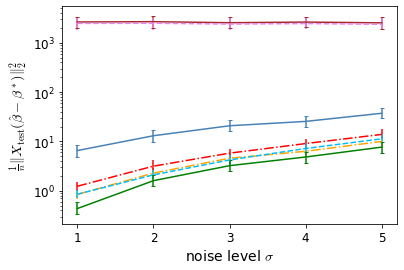

In [106]:
plt.errorbar(xs, LA_pred_med, yerr = LA_pred_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_pred_med, yerr = EN_pred_err, fmt = '--', color = 'violet', label = "EN")
plt.errorbar(xs, FL_pred_med, yerr = FL_pred_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_pred_med, yerr = SL_pred_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_pred_med, yerr = GTVEST_pred_err, capsize = 2, color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_pred_med, yerr = GTVORC_pred_err, fmt = '--',color = 'deepskyblue', label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_pred_med, yerr = GEN_pred_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.yticks([1, 10, 100, 1000], size = 12)
plt.xticks(["1",'2','3','4', '5'], size = 12)
plt.xlabel(r"noise level $\sigma$", size = 14)
plt.ylabel(r'$\frac{1}{n}\| X_{\mathrm{test}}(\hat{\beta} - \beta^*)\|_2^2$', size = 14)
plt.savefig('134b_v2.jpg', bbox_inches='tight', dpi = 600)